In [377]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

results_gov = pickle.load(open("results_gov.pkl", "rb"))
results_no_gov = pickle.load(open("results_no_gov.pkl", "rb"))
results_ad_valorem = pickle.load(open("results_ad_valorem.pkl", "rb"))
results_both = pickle.load(open("results_both.pkl", "rb"))

In [378]:
def quadtaric_fit(x, y):
    poly = PolynomialFeatures(degree=2, include_bias=False)
    x_poly = poly.fit_transform(x.reshape(-1, 1))
    model = LinearRegression()
    model.fit(x_poly, y)
    return model.predict(x_poly)

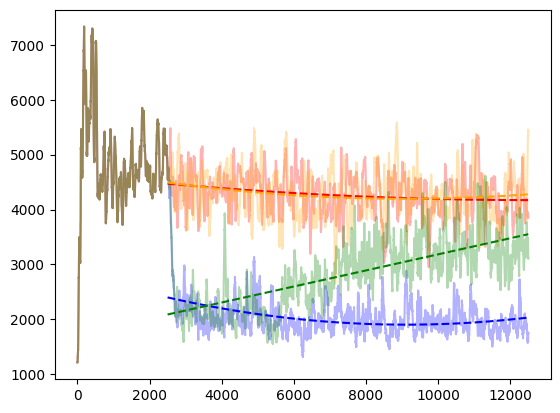

In [ ]:
plt.plot(results_gov["AverageRent"], label="Average Rent", color="blue", alpha=0.3)
plt.plot(results_no_gov["AverageRent"], label="Average Rent without Gov", color="red", alpha=0.3)
plt.plot(results_ad_valorem["AverageRent"], label="Average Rent with Ad Valorem", color="orange", alpha=0.3)
plt.plot(results_both["AverageRent"], label="Average Rent with Both", color="green", alpha=0.3)

fit_len = 10000
def fit_x_y(series):
    if len(series) > fit_len:
        x = np.array(range(len(series)))[-fit_len:]
        y = np.array(series)[-fit_len:]
    else:
        x = np.array(range(len(series)))
        y = np.array(series)
    return x, y

x_gov_fit, y_gov_fit = fit_x_y(results_gov["AverageRent"])
x_no_gov_fit, y_no_gov_fit = fit_x_y(results_no_gov["AverageRent"])
x_ad_valorem_fit, y_ad_valorem_fit = fit_x_y(results_ad_valorem["AverageRent"])
x_both_fit, y_both_fit = fit_x_y(results_both["AverageRent"])

plt.plot(np.concatenate((np.full(len(results_gov["AverageRent"]) - len(x_gov_fit), np.nan), quadtaric_fit(x_gov_fit, y_gov_fit))), label="Gov", color="blue", linestyle="dashed")
plt.plot(np.concatenate((np.full(len(results_no_gov["AverageRent"]) - len(x_no_gov_fit), np.nan), quadtaric_fit(x_no_gov_fit, y_no_gov_fit))), label=" No Gov", color="red", linestyle="dashed")
plt.plot(np.concatenate((np.full(len(results_ad_valorem["AverageRent"]) - len(x_ad_valorem_fit), np.nan), quadtaric_fit(x_ad_valorem_fit, y_ad_valorem_fit))), label=" Ad Valorem", color="orange", linestyle="dashed")
plt.plot(np.concatenate((np.full(len(results_both["AverageRent"]) - len(x_both_fit), np.nan), quadtaric_fit(x_both_fit, y_both_fit))), label=" Both", color="green", linestyle="dashed")

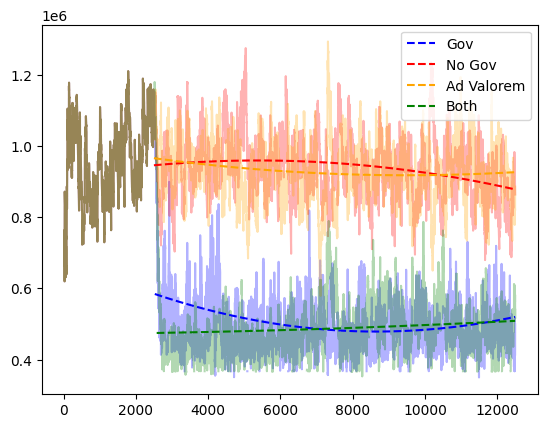

In [380]:
#average sell price
plt.plot(results_gov["AverageSellPrice"], color="blue", alpha=0.3)
plt.plot(results_no_gov["AverageSellPrice"], color="red", alpha=0.3)
plt.plot(results_ad_valorem["AverageSellPrice"],  color="orange", alpha=0.3)
plt.plot(results_both["AverageSellPrice"],  color="green", alpha=0.3)

def fit_x_y(series):
    if len(series) > fit_len:
        x = np.array(range(len(series)))[-fit_len:]
        y = np.array(series)[-fit_len:]
    else:
        x = np.array(range(len(series)))
        y = np.array(series)
    # Remove NaNs from both x and y
    mask = ~np.isnan(y)
    return x[mask], y[mask]

x_gov_fit, y_gov_fit = fit_x_y(results_gov["AverageSellPrice"])
x_no_gov_fit, y_no_gov_fit = fit_x_y(results_no_gov["AverageSellPrice"])
x_ad_valorem_fit, y_ad_valorem_fit = fit_x_y(results_ad_valorem["AverageSellPrice"])
x_both_fit, y_both_fit = fit_x_y(results_both["AverageSellPrice"])

plt.plot(np.concatenate((np.full(len(results_gov["AverageSellPrice"]) - len(x_gov_fit), np.nan), quadtaric_fit(x_gov_fit, y_gov_fit))), label="Gov", color="blue", linestyle="dashed")
plt.plot(np.concatenate((np.full(len(results_no_gov["AverageSellPrice"]) - len(x_no_gov_fit), np.nan), quadtaric_fit(x_no_gov_fit, y_no_gov_fit))), label="No Gov", color="red", linestyle="dashed")
plt.plot(np.concatenate((np.full(len(results_ad_valorem["AverageSellPrice"]) - len(x_ad_valorem_fit), np.nan), quadtaric_fit(x_ad_valorem_fit, y_ad_valorem_fit))), label="Ad Valorem", color="orange", linestyle="dashed")
plt.plot(np.concatenate((np.full(len(results_both["AverageSellPrice"]) - len(x_both_fit), np.nan), quadtaric_fit(x_both_fit, y_both_fit))), label="Both", color="green", linestyle="dashed")
plt.legend()

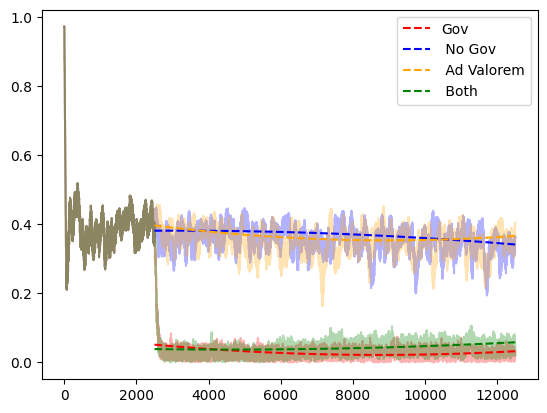

In [381]:
# Homelessness Rate - plot all values, quadratic fit only on last 500
plt.plot(results_gov["HomelessnessRate"],  color="red", alpha=0.3)
plt.plot(results_no_gov["HomelessnessRate"], color="blue", alpha=0.3)
plt.plot(results_ad_valorem["HomelessnessRate"],  color="orange", alpha=0.3)
plt.plot(results_both["HomelessnessRate"],  color="green", alpha=0.3)

def fit_x_y(series):
    if len(series) > fit_len:
        x = np.array(range(len(series)))[-fit_len:]
        y = np.array(series)[-fit_len:]
    else:
        x = np.array(range(len(series)))
        y = np.array(series)
    return x, y

x_gov_fit, y_gov_fit = fit_x_y(results_gov["HomelessnessRate"])
x_no_gov_fit, y_no_gov_fit = fit_x_y(results_no_gov["HomelessnessRate"])
x_ad_valorem_fit, y_ad_valorem_fit = fit_x_y(results_ad_valorem["HomelessnessRate"])
x_both_fit, y_both_fit = fit_x_y(results_both["HomelessnessRate"])

plt.plot(np.concatenate((np.full(len(results_gov["HomelessnessRate"]) - len(x_gov_fit), np.nan), quadtaric_fit(x_gov_fit, y_gov_fit))), label="Gov", color="red", linestyle="dashed")
plt.plot(np.concatenate((np.full(len(results_no_gov["HomelessnessRate"]) - len(x_no_gov_fit), np.nan), quadtaric_fit(x_no_gov_fit, y_no_gov_fit))), label=" No Gov", color="blue", linestyle="dashed")
plt.plot(np.concatenate((np.full(len(results_ad_valorem["HomelessnessRate"]) - len(x_ad_valorem_fit), np.nan), quadtaric_fit(x_ad_valorem_fit, y_ad_valorem_fit))), label=" Ad Valorem", color="orange", linestyle="dashed")
plt.plot(np.concatenate((np.full(len(results_both["HomelessnessRate"]) - len(x_both_fit), np.nan), quadtaric_fit(x_both_fit, y_both_fit))), label=" Both", color="green", linestyle="dashed")
plt.legend()

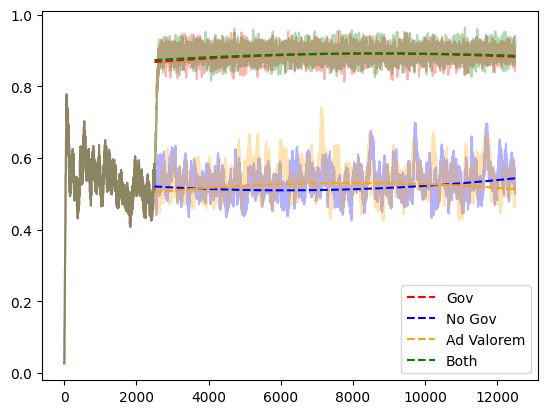

In [382]:
# House Ownership Rate - plot all values, quadratic fit only on last 500
plt.plot(results_gov["HouseOwnershipRate"], color="red", alpha=0.3)
plt.plot(results_no_gov["HouseOwnershipRate"], color="blue", alpha=0.3)
plt.plot(results_ad_valorem["HouseOwnershipRate"], color="orange", alpha=0.3)
plt.plot(results_both["HouseOwnershipRate"], color="green", alpha=0.3)

def fit_x_y(series):
    if len(series) > fit_len:
        x = np.array(range(len(series)))[-fit_len:]
        y = np.array(series)[-fit_len:]
    else:
        x = np.array(range(len(series)))
        y = np.array(series)
    return x, y

x_gov_fit, y_gov_fit = fit_x_y(results_gov["HouseOwnershipRate"])
x_no_gov_fit, y_no_gov_fit = fit_x_y(results_no_gov["HouseOwnershipRate"])
x_ad_valorem_fit, y_ad_valorem_fit = fit_x_y(results_ad_valorem["HouseOwnershipRate"])
x_both_fit, y_both_fit = fit_x_y(results_both["HouseOwnershipRate"])

plt.plot(np.concatenate((np.full(len(results_gov["HouseOwnershipRate"]) - len(x_gov_fit), np.nan), quadtaric_fit(x_gov_fit, y_gov_fit))), label="Gov", color="red", linestyle="dashed")
plt.plot(np.concatenate((np.full(len(results_no_gov["HouseOwnershipRate"]) - len(x_no_gov_fit), np.nan), quadtaric_fit(x_no_gov_fit, y_no_gov_fit))), label="No Gov", color="blue", linestyle="dashed")
plt.plot(np.concatenate((np.full(len(results_ad_valorem["HouseOwnershipRate"]) - len(x_ad_valorem_fit), np.nan), quadtaric_fit(x_ad_valorem_fit, y_ad_valorem_fit))), label="Ad Valorem", color="orange", linestyle="dashed")
plt.plot(np.concatenate((np.full(len(results_both["HouseOwnershipRate"]) - len(x_both_fit), np.nan), quadtaric_fit(x_both_fit, y_both_fit))), label="Both", color="green", linestyle="dashed")
plt.legend()

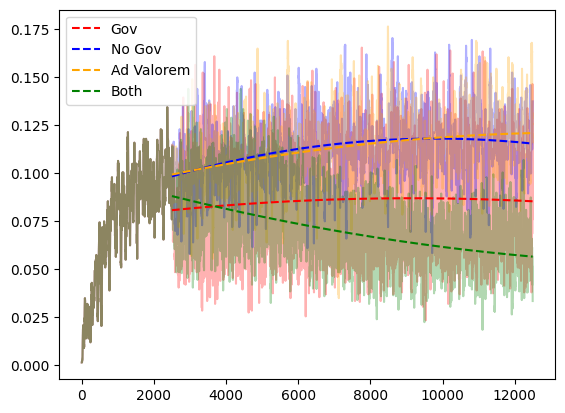

In [383]:
# Rent Rate - plot all values, quadratic fit only on last 500
plt.plot(results_gov["RentRate"], color="red", alpha=0.3)
plt.plot(results_no_gov["RentRate"], color="blue", alpha=0.3)
plt.plot(results_ad_valorem["RentRate"], color="orange", alpha=0.3)
plt.plot(results_both["RentRate"], color="green", alpha=0.3)

def fit_x_y(series):
    if len(series) > fit_len:
        x = np.array(range(len(series)))[-fit_len:]
        y = np.array(series)[-fit_len:]
    else:
        x = np.array(range(len(series)))
        y = np.array(series)
    return x, y

x_gov_fit, y_gov_fit = fit_x_y(results_gov["RentRate"])
x_no_gov_fit, y_no_gov_fit = fit_x_y(results_no_gov["RentRate"])
x_ad_valorem_fit, y_ad_valorem_fit = fit_x_y(results_ad_valorem["RentRate"])
x_both_fit, y_both_fit = fit_x_y(results_both["RentRate"])

plt.plot(np.concatenate((np.full(len(results_gov["RentRate"]) - len(x_gov_fit), np.nan), quadtaric_fit(x_gov_fit, y_gov_fit))), label="Gov", color="red", linestyle="dashed")
plt.plot(np.concatenate((np.full(len(results_no_gov["RentRate"]) - len(x_no_gov_fit), np.nan), quadtaric_fit(x_no_gov_fit, y_no_gov_fit))), label="No Gov", color="blue", linestyle="dashed")
plt.plot(np.concatenate((np.full(len(results_ad_valorem["RentRate"]) - len(x_ad_valorem_fit), np.nan), quadtaric_fit(x_ad_valorem_fit, y_ad_valorem_fit))), label="Ad Valorem", color="orange", linestyle="dashed")
plt.plot(np.concatenate((np.full(len(results_both["RentRate"]) - len(x_both_fit), np.nan), quadtaric_fit(x_both_fit, y_both_fit))), label="Both", color="green", linestyle="dashed")
plt.legend()

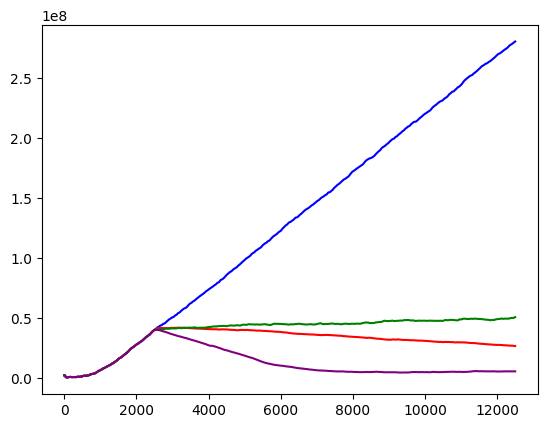

In [384]:
plt.plot(results_no_gov["LandlordCapital"], label="Landlord Capital without Gov", color="blue")
plt.plot(results_gov["LandlordCapital"], label="Landlord Capital with Gov", color="red")
plt.plot(results_ad_valorem["LandlordCapital"], label="Landlord Capital with Ad Valorem", color="green")
plt.plot(results_both["LandlordCapital"], label="Landlord Capital with Both", color="purple")
plt.show()

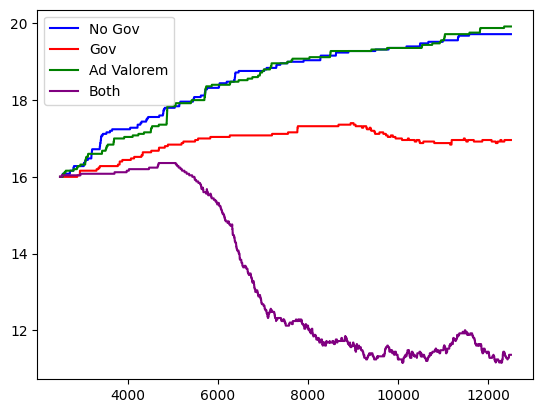

In [385]:
plt.plot(results_no_gov["LandlordOwnedProperties"][-fit_len:], label="No Gov", color="blue" )
plt.plot(results_gov["LandlordOwnedProperties"][-fit_len:], label="Gov", color="red")
plt.plot(results_ad_valorem["LandlordOwnedProperties"][-fit_len:], label="Ad Valorem", color="green")
plt.plot(results_both["LandlordOwnedProperties"][-fit_len:], label="Both", color="purple")
plt.legend()
plt.show()

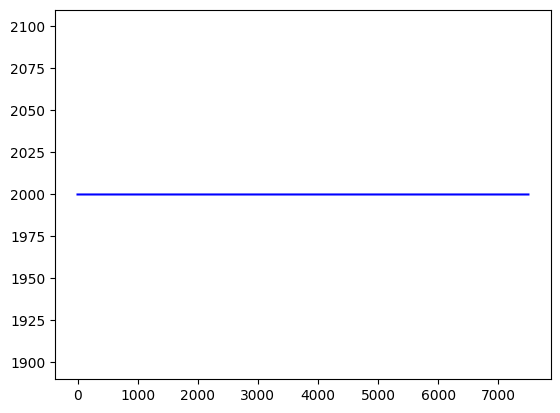

In [374]:
# 'ResidentsCount'
plt.plot(results_gov["ResidentsCount"], label="Residents Count", color="blue")
plt.show()

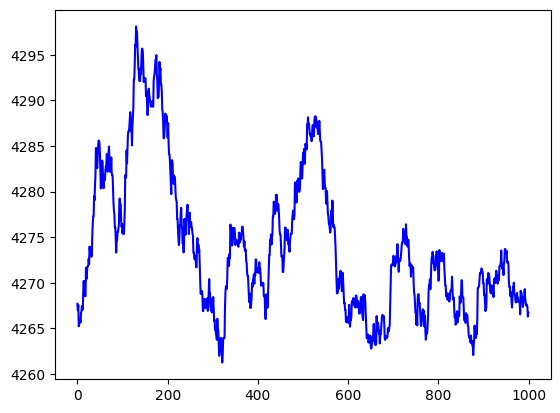

In [349]:
#"AverageIncome"
plt.plot(results["AverageIncome"], label="Average Income", color="blue")
plt.show()

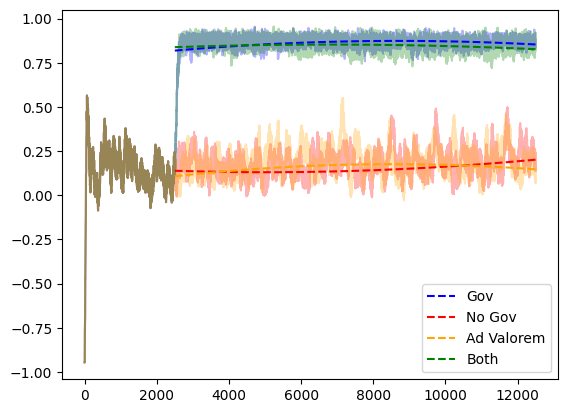

In [389]:
# AverageHappiness - plot all values, quadratic fit only on last 500
plt.plot(results_gov["AverageHappiness"], color="blue", alpha=0.3)
plt.plot(results_no_gov["AverageHappiness"], color="red", alpha=0.3)
plt.plot(results_ad_valorem["AverageHappiness"], color="orange", alpha=0.3)
plt.plot(results_both["AverageHappiness"], color="green", alpha=0.3)

def fit_x_y(series):
    if len(series) > fit_len:
        x = np.array(range(len(series)))[-fit_len:]
        y = np.array(series)[-fit_len:]
    else:
        x = np.array(range(len(series)))
        y = np.array(series)
    return x, y

x_gov_fit, y_gov_fit = fit_x_y(results_gov["AverageHappiness"])
x_no_gov_fit, y_no_gov_fit = fit_x_y(results_no_gov["AverageHappiness"])
x_ad_valorem_fit, y_ad_valorem_fit = fit_x_y(results_ad_valorem["AverageHappiness"])
x_both_fit, y_both_fit = fit_x_y(results_both["AverageHappiness"])

plt.plot(np.concatenate((np.full(len(results_gov["AverageHappiness"]) - len(x_gov_fit), np.nan), quadtaric_fit(x_gov_fit, y_gov_fit))), label="Gov", color="blue", linestyle="dashed")
plt.plot(np.concatenate((np.full(len(results_no_gov["AverageHappiness"]) - len(x_no_gov_fit), np.nan), quadtaric_fit(x_no_gov_fit, y_no_gov_fit))), label="No Gov", color="red", linestyle="dashed")
plt.plot(np.concatenate((np.full(len(results_ad_valorem["AverageHappiness"]) - len(x_ad_valorem_fit), np.nan), quadtaric_fit(x_ad_valorem_fit, y_ad_valorem_fit))), label="Ad Valorem", color="orange", linestyle="dashed")
plt.plot(np.concatenate((np.full(len(results_both["AverageHappiness"]) - len(x_both_fit), np.nan), quadtaric_fit(x_both_fit, y_both_fit))), label="Both", color="green", linestyle="dashed")
plt.legend()
plt.show()